# TUMOR MALIGNENT OR BENIGN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

Data reading

In [4]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Correlation coefficients

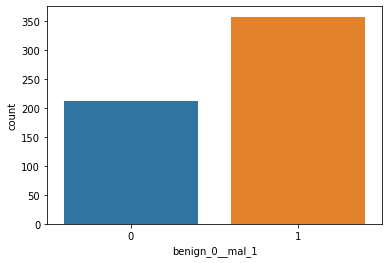

In [9]:
sns.countplot(x='benign_0__mal_1',data=df)

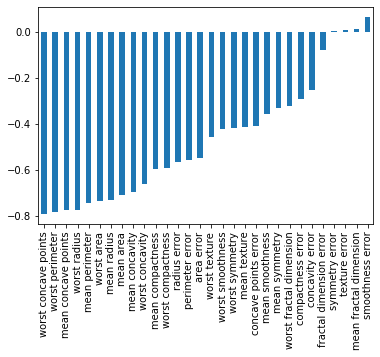

In [15]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

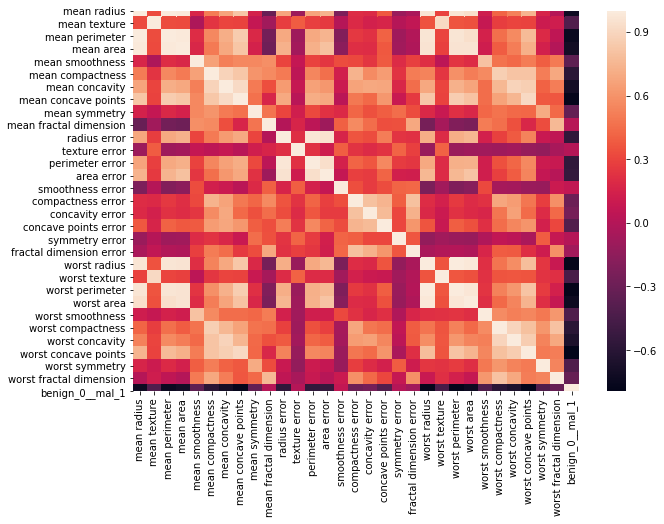

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr())

Data preprocessing

In [18]:
X= df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train= scaler.fit_transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense

# Network Model Preparation

In [28]:
model = Sequential()

In [29]:
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#BINARY Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [30]:
model.fit(x= X_train, y = y_train, epochs=600, 
          validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 3s 7ms/sample - loss: 0.6956 - val_loss: 0.6747
Epoch 2/600
426/426 [==============================] - 0s 150us/sample - loss: 0.6573 - val_loss: 0.6393
Epoch 3/600
426/426 [==============================] - 0s 150us/sample - loss: 0.6205 - val_loss: 0.6024
Epoch 4/600
426/426 [==============================] - 0s 150us/sample - loss: 0.5834 - val_loss: 0.5640
Epoch 5/600
426/426 [==============================] - 0s 150us/sample - loss: 0.5418 - val_loss: 0.5217
Epoch 6/600
426/426 [==============================] - 0s 263us/sample - loss: 0.4988 - val_loss: 0.4752
Epoch 7/600
426/426 [==============================] - 0s 244us/sample - loss: 0.4528 - val_loss: 0.4273
Epoch 8/600
426/426 [==============================] - 0s 287us/sample - loss: 0.4074 - val_loss: 0.3821
Epoch 9/600
426/426 [==============================] - 0s 169us/sample - loss: 0.3663 - val_loss: 0.3417
Epoch 10/60

426/426 [==============================] - 0s 150us/sample - loss: 0.0597 - val_loss: 0.1212
Epoch 78/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0562 - val_loss: 0.1122
Epoch 79/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0560 - val_loss: 0.1186
Epoch 80/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0558 - val_loss: 0.1181
Epoch 81/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0553 - val_loss: 0.1153
Epoch 82/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0550 - val_loss: 0.1221
Epoch 83/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0556 - val_loss: 0.1198
Epoch 84/600
426/426 [==============================] - 0s 188us/sample - loss: 0.0543 - val_loss: 0.1238
Epoch 85/600
426/426 [==============================] - 0s 188us/sample - loss: 0.0559 - val_loss: 0.1230
Epoch 86/600
426/426 [==============================] - 0s 

Epoch 154/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0479 - val_loss: 0.1364
Epoch 155/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0455 - val_loss: 0.1472
Epoch 156/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0460 - val_loss: 0.1468
Epoch 157/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0475 - val_loss: 0.1390
Epoch 158/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0557 - val_loss: 0.1352
Epoch 159/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0459 - val_loss: 0.1483
Epoch 160/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0451 - val_loss: 0.1347
Epoch 161/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0468 - val_loss: 0.1444
Epoch 162/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0454 - val_loss: 0.1521
Epoch 163/600
426/426 [==============

426/426 [==============================] - 0s 179us/sample - loss: 0.0435 - val_loss: 0.1720
Epoch 231/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0421 - val_loss: 0.1569
Epoch 232/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0417 - val_loss: 0.1557
Epoch 233/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0453 - val_loss: 0.1549
Epoch 234/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0486 - val_loss: 0.1575
Epoch 235/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0411 - val_loss: 0.1784
Epoch 236/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0443 - val_loss: 0.1483
Epoch 237/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0405 - val_loss: 0.1784
Epoch 238/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0417 - val_loss: 0.1513
Epoch 239/600
426/426 [============================

426/426 [==============================] - 0s 486us/sample - loss: 0.0381 - val_loss: 0.1852
Epoch 307/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0401 - val_loss: 0.1580
Epoch 308/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0409 - val_loss: 0.1662
Epoch 309/600
426/426 [==============================] - 0s 188us/sample - loss: 0.0370 - val_loss: 0.1663
Epoch 310/600
426/426 [==============================] - 0s 181us/sample - loss: 0.0384 - val_loss: 0.1843
Epoch 311/600
426/426 [==============================] - 0s 183us/sample - loss: 0.0365 - val_loss: 0.1611
Epoch 312/600
426/426 [==============================] - 0s 202us/sample - loss: 0.0371 - val_loss: 0.1728
Epoch 313/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0379 - val_loss: 0.1756
Epoch 314/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0376 - val_loss: 0.1718
Epoch 315/600
426/426 [============================

426/426 [==============================] - 0s 188us/sample - loss: 0.0343 - val_loss: 0.1843
Epoch 383/600
426/426 [==============================] - 0s 188us/sample - loss: 0.0392 - val_loss: 0.1893
Epoch 384/600
426/426 [==============================] - 0s 188us/sample - loss: 0.0450 - val_loss: 0.1959
Epoch 385/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0375 - val_loss: 0.1858
Epoch 386/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0420 - val_loss: 0.1680
Epoch 387/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0397 - val_loss: 0.2094
Epoch 388/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0367 - val_loss: 0.1763
Epoch 389/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0328 - val_loss: 0.1841
Epoch 390/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0327 - val_loss: 0.1898
Epoch 391/600
426/426 [============================

426/426 [==============================] - 0s 169us/sample - loss: 0.0363 - val_loss: 0.1968
Epoch 459/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0362 - val_loss: 0.2185
Epoch 460/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0409 - val_loss: 0.1817
Epoch 461/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0336 - val_loss: 0.2136
Epoch 462/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0295 - val_loss: 0.1877
Epoch 463/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0312 - val_loss: 0.2169
Epoch 464/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0354 - val_loss: 0.1892
Epoch 465/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0356 - val_loss: 0.2252
Epoch 466/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0367 - val_loss: 0.1816
Epoch 467/600
426/426 [============================

426/426 [==============================] - 0s 155us/sample - loss: 0.0268 - val_loss: 0.2000
Epoch 535/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0335 - val_loss: 0.2578
Epoch 536/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0320 - val_loss: 0.2187
Epoch 537/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0304 - val_loss: 0.2124
Epoch 538/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0287 - val_loss: 0.2445
Epoch 539/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0277 - val_loss: 0.1967
Epoch 540/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0334 - val_loss: 0.2648
Epoch 541/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0321 - val_loss: 0.1895
Epoch 542/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0287 - val_loss: 0.2479
Epoch 543/600
426/426 [============================

Losses Checking

In [31]:
losses = pd.DataFrame(model.history.history)

In [32]:
losses.head()

,loss,val_loss
0,0.695593,0.674730
1,0.657260,0.639271
2,0.620489,0.602401
3,0.583431,0.563957
4,0.541830,0.521730


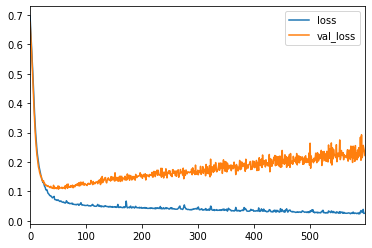

In [33]:
losses.plot()

Redefining Model

In [34]:
model = Sequential()

In [35]:
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#BINARY Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',
                           verbose =1,patience=25)

In [40]:
model.fit(x= X_train, y = y_train, epochs=600, 
          validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6674 - val_loss: 0.6559
Epoch 2/600
426/426 [==============================] - 0s 160us/sample - loss: 0.6309 - val_loss: 0.6241
Epoch 3/600
426/426 [==============================] - 0s 150us/sample - loss: 0.5994 - val_loss: 0.5900
Epoch 4/600
426/426 [==============================] - 0s 150us/sample - loss: 0.5619 - val_loss: 0.5483
Epoch 5/600
426/426 [==============================] - 0s 164us/sample - loss: 0.5231 - val_loss: 0.5106
Epoch 6/600
426/426 [==============================] - 0s 146us/sample - loss: 0.4873 - val_loss: 0.4747
Epoch 7/600
426/426 [==============================] - 0s 150us/sample - loss: 0.4534 - val_loss: 0.4381
Epoch 8/600
426/426 [==============================] - 0s 148us/sample - loss: 0.4196 - val_loss: 0.4026
Epoch 9/600
426/426 [==============================] - 0s 162us/sample - loss: 0.3872 - val_loss: 0.3681
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0534 - val_loss: 0.0804
Epoch 79/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0544 - val_loss: 0.0875
Epoch 80/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0557 - val_loss: 0.0838
Epoch 81/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0566 - val_loss: 0.0860
Epoch 82/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0540 - val_loss: 0.0858
Epoch 83/600
426/426 [==============================] - 0s 146us/sample - loss: 0.0530 - val_loss: 0.0827
Epoch 84/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0513 - val_loss: 0.0956
Epoch 85/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0557 - val_loss: 0.0814
Epoch 86/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0541 - val_loss: 0.0851
Epoch 87/600
426/426 [========================

In [41]:
loss = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'NON CALLBACK MODEL')

<Figure size 720x504 with 0 Axes>

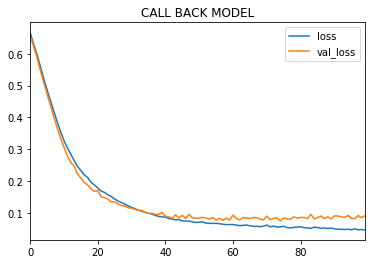

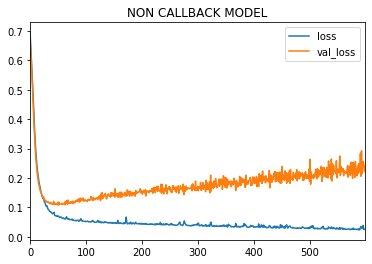

In [44]:
plt.figure(figsize=(10,7))
loss.plot()
plt.title('CALL BACK MODEL')
losses.plot()
plt.title('NON CALLBACK MODEL')

Dropout

In [45]:
from tensorflow.keras.layers import Dropout

In [46]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#BINARY Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [48]:
model.fit(x= X_train, y = y_train, epochs=600, 
          validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.7096 - val_loss: 0.6635
Epoch 2/600
426/426 [==============================] - 0s 157us/sample - loss: 0.6795 - val_loss: 0.6464
Epoch 3/600
426/426 [==============================] - 0s 204us/sample - loss: 0.6682 - val_loss: 0.6335
Epoch 4/600
426/426 [==============================] - 0s 207us/sample - loss: 0.6515 - val_loss: 0.6212
Epoch 5/600
426/426 [==============================] - 0s 251us/sample - loss: 0.6516 - val_loss: 0.6060
Epoch 6/600
426/426 [==============================] - 0s 197us/sample - loss: 0.6226 - val_loss: 0.5844
Epoch 7/600
426/426 [==============================] - 0s 207us/sample - loss: 0.6015 - val_loss: 0.5597
Epoch 8/600
426/426 [==============================] - 0s 221us/sample - loss: 0.5804 - val_loss: 0.5320
Epoch 9/600
426/426 [==============================] - 0s 221us/sample - loss: 0.5481 - val_loss: 0.4997
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 240us/sample - loss: 0.1124 - val_loss: 0.1055
Epoch 79/600
426/426 [==============================] - 0s 221us/sample - loss: 0.1445 - val_loss: 0.1056
Epoch 80/600
426/426 [==============================] - 0s 230us/sample - loss: 0.1233 - val_loss: 0.0974
Epoch 81/600
426/426 [==============================] - 0s 345us/sample - loss: 0.1150 - val_loss: 0.0994
Epoch 82/600
426/426 [==============================] - 0s 272us/sample - loss: 0.1182 - val_loss: 0.0980
Epoch 83/600
426/426 [==============================] - 0s 218us/sample - loss: 0.1104 - val_loss: 0.0964
Epoch 84/600
426/426 [==============================] - 0s 221us/sample - loss: 0.1184 - val_loss: 0.0973
Epoch 85/600
426/426 [==============================] - 0s 218us/sample - loss: 0.1249 - val_loss: 0.1058
Epoch 86/600
426/426 [==============================] - 0s 240us/sample - loss: 0.1210 - val_loss: 0.1032
Epoch 87/600
426/426 [========================

In [49]:
drop_loss  = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'DROPOUT AND CALLBACKS')

<Figure size 720x504 with 0 Axes>

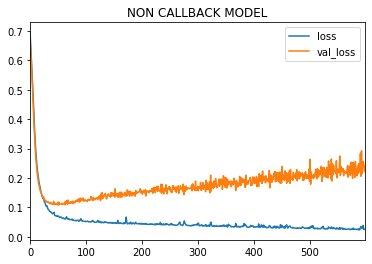

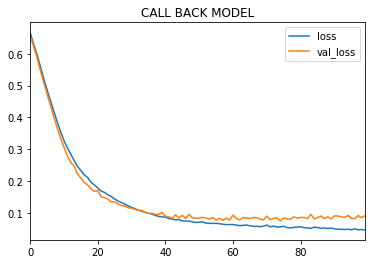

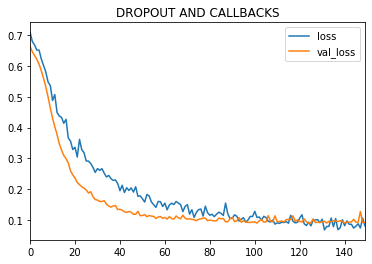

In [52]:
plt.figure(figsize=(10,7))

losses.plot()
plt.title('NON CALLBACK MODEL')

loss.plot()
plt.title('CALL BACK MODEL')

drop_loss.plot()
plt.title('DROPOUT AND CALLBACKS')

In [53]:
predict = model.predict_classes(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [57]:
print(confusion_matrix(y_test,predict))

[[54  1]
 [ 3 85]]


MODEL IS SUCCESSFUL SAVE IT

saving model in a html file

In [60]:
model.save('Cancer Prediction.h5')

# DONE